# Optimizer Example
MNIST RNN example showing comparison between *newer* optimizers that appeared *after* Adam.. This is a classification problem.

Richard Henry, 26-Jul-2024 

Adapted from Keras Documentation (via Kaggle). https://www.kaggle.com/code/ankan1998/image-classification-with-recurrent-neural-network

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.17.0'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

|Dataset|Architecture|Group|Type|
|:---|:---|:---|:---|
|MNIST Handwritten Digits|RNN|Modern|Classification|

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28,28)
batch_size = 128
num_epochs = 32

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_core(mShape,mClass):
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=mShape),
            tf.keras.layers.SimpleRNN(128),
            tf.keras.layers.Dense(128,
                           activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(mClass,
                                  activation="softmax"),
        ]
    )
    return model    
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19)
    model=model_core(myShap,myClas)
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    # Reduce variation in training...
    tf.random.set_seed(17)
    print("History Match:")
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    print("\n")
    print("Evaluate Model:")
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("\n")
    print("Timing:")
    return myHis

### First Model, Adam

In [7]:
%%time
h0=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7506 - loss: 0.7765 - val_accuracy: 0.9533 - val_loss: 0.1587
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9355 - loss: 0.2150 - val_accuracy: 0.9598 - val_loss: 0.1407
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9508 - loss: 0.1627 - val_accuracy: 0.9628 - val_loss: 0.1247
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9599 - loss: 0.1357 - val_accuracy: 0.9608 - val_loss: 0.1295
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9636 - loss: 0.1228 - val_accuracy: 0.9702 - val_loss: 0.1054
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9654 - loss: 0.1166 - val_accuracy: 0.9715 - val_loss: 0.1011
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9690 - loss: 0.1049 - val_accuracy: 0.9752 - val_loss: 0.0900
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9695 - loss: 0.1049 - v

### Second Model, Adam + Weight Decay

In [8]:
%%time
h1=model_build('adamw',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7401 - loss: 0.7959 - val_accuracy: 0.9507 - val_loss: 0.1720
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9373 - loss: 0.2132 - val_accuracy: 0.9563 - val_loss: 0.1410
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9512 - loss: 0.1653 - val_accuracy: 0.9608 - val_loss: 0.1319
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9589 - loss: 0.1420 - val_accuracy: 0.9667 - val_loss: 0.1173
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9641 - loss: 0.1227 - val_accuracy: 0.9752 - val_loss: 0.0904
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9679 - loss: 0.1144 - val_accuracy: 0.9732 - val_loss: 0.0879
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9686 - loss: 0.1072 - val_accuracy: 0.9692 - val_loss: 0.1042
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9703 - loss: 0.1019 - v

### Third Model, AdaFactor

In [9]:
%%time
h2=model_build('adafactor',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5231 - loss: 1.5214 - val_accuracy: 0.8735 - val_loss: 0.4713
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8457 - loss: 0.5119 - val_accuracy: 0.9190 - val_loss: 0.2848
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8932 - loss: 0.3588 - val_accuracy: 0.9323 - val_loss: 0.2304
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9115 - loss: 0.2944 - val_accuracy: 0.9380 - val_loss: 0.1999
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9232 - loss: 0.2567 - val_accuracy: 0.9440 - val_loss: 0.1797
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9312 - loss: 0.2288 - val_accuracy: 0.9513 - val_loss: 0.1611
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9389 - loss: 0.2059 - val_accuracy: 0.9562 - val_loss: 0.1498
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9438 - loss: 0.189

### 4th Model, LION

In [10]:
%%time
h3=model_build('lion',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7638 - loss: 0.7426 - val_accuracy: 0.9073 - val_loss: 0.3582
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9069 - loss: 0.3397 - val_accuracy: 0.9213 - val_loss: 0.2874
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8937 - loss: 0.3886 - val_accuracy: 0.9022 - val_loss: 0.3400
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8273 - loss: 0.6003 - val_accuracy: 0.8095 - val_loss: 0.6142
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7568 - loss: 0.7839 - val_accuracy: 0.6103 - val_loss: 1.0363
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5382 - loss: 1.3150 - val_accuracy: 0.5135 - val_loss: 1.3452
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4782 - loss: 1.4841 - val_accuracy: 0.6747 - val_loss: 0.9771
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5415 - loss: 1.2931 - v

### 5th Model, Adam with Nesterov Momentum

In [11]:
%%time
h4=model_build('nadam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7444 - loss: 0.7874 - val_accuracy: 0.9503 - val_loss: 0.1669
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9416 - loss: 0.1949 - val_accuracy: 0.9587 - val_loss: 0.1372
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9549 - loss: 0.1468 - val_accuracy: 0.9662 - val_loss: 0.1193
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9615 - loss: 0.1251 - val_accuracy: 0.9672 - val_loss: 0.1109
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9671 - loss: 0.1094 - val_accuracy: 0.9693 - val_loss: 0.1005
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9689 - loss: 0.1014 - val_accuracy: 0.9753 - val_loss: 0.0867
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9715 - loss: 0.0930 - val_accuracy: 0.9722 - val_loss: 0.0906
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9741 - loss: 0.0878 - v

### 6th Model, Follow the Regularized Leader

In [12]:
%%time
h5=model_build('ftrl',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1146 - loss: 2.3027 - val_accuracy: 0.1050 - val_loss: 2.3024
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1155 - loss: 2.3023 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1155 - loss: 2.3022 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1155 - loss: 2.3021 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1155 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1155 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1155 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1155 - loss: 2.3018 -

### 7th Model, AdaMax

In [13]:
%%time
h6=model_build('adamax',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6838 - loss: 0.9664 - val_accuracy: 0.9325 - val_loss: 0.2261
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9187 - loss: 0.2683 - val_accuracy: 0.9555 - val_loss: 0.1496
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9396 - loss: 0.1980 - val_accuracy: 0.9600 - val_loss: 0.1325
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9520 - loss: 0.1646 - val_accuracy: 0.9657 - val_loss: 0.1142
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9573 - loss: 0.1423 - val_accuracy: 0.9697 - val_loss: 0.1044
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9628 - loss: 0.1239 - val_accuracy: 0.9707 - val_loss: 0.0986
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9660 - loss: 0.1146 - val_accuracy: 0.9768 - val_loss: 0.0811
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9689 - loss: 0.1036 -

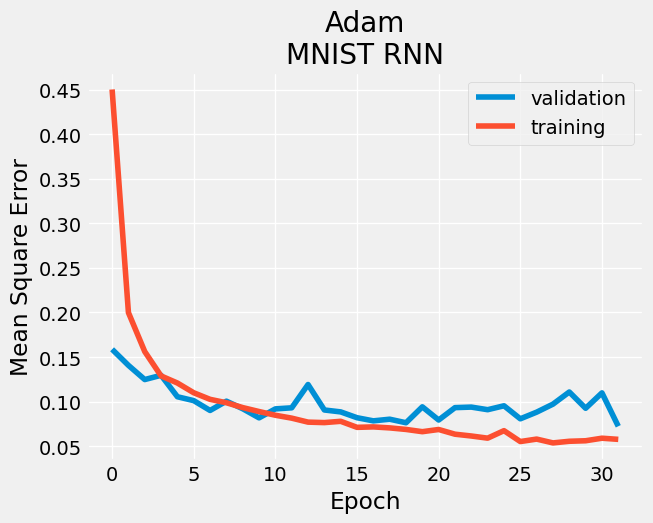

In [14]:
plt.plot(h0.history['val_loss'])
plt.plot(h0.history['loss'])
plt.ylabel('Mean Square Error')
plt.xlabel('Epoch')
plt.legend(['validation','training'])
plt.title('Adam\nMNIST RNN')
plt.grid(color='white')
plt.show()

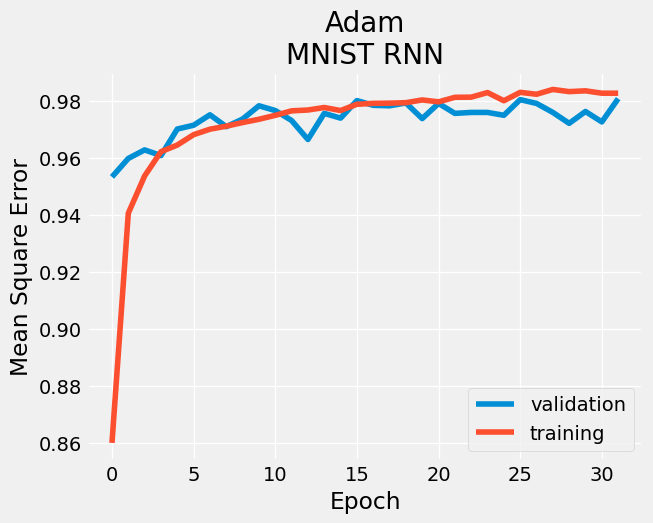

In [15]:
plt.plot(h0.history['val_accuracy'])
plt.plot(h0.history['accuracy'])
plt.ylabel('Mean Square Error')
plt.xlabel('Epoch')
plt.legend(['validation','training'])
plt.title('Adam\nMNIST RNN')
plt.grid(color='white')
plt.show()

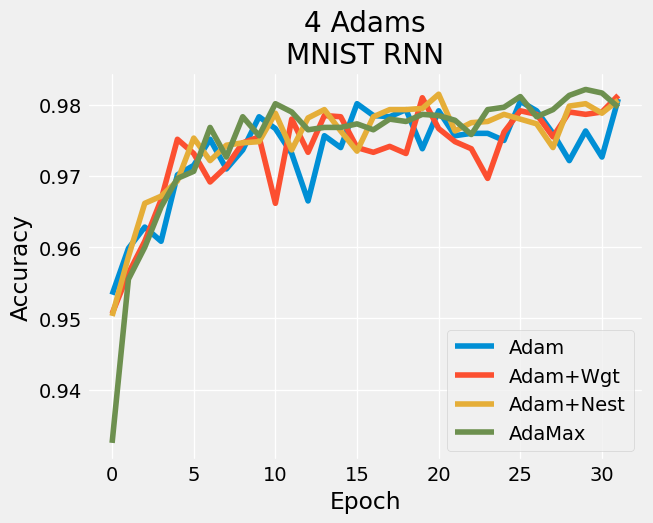

In [16]:
plt.plot(h0.history['val_accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.plot(h4.history['val_accuracy'])
plt.plot(h6.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','Adam+Wgt','Adam+Nest','AdaMax'])
plt.title('4 Adams\nMNIST RNN')
plt.grid(color='white')
plt.show()

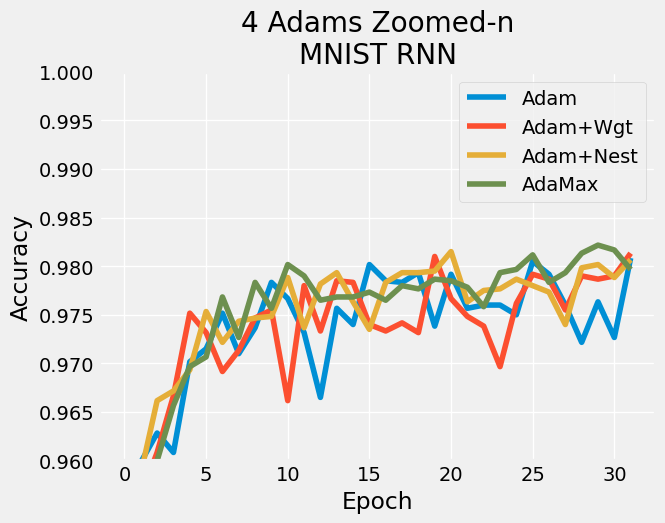

In [17]:
plt.plot(h0.history['val_accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.plot(h4.history['val_accuracy'])
plt.plot(h6.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','Adam+Wgt','Adam+Nest','AdaMax'])
plt.title('4 Adams Zoomed-n\nMNIST RNN')
plt.ylim([0.96,1.00])
plt.grid(color='white')
plt.show()

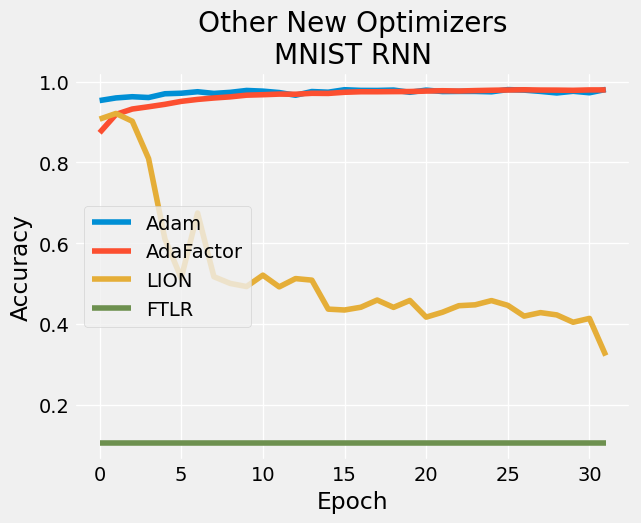

In [18]:
plt.plot(h0.history['val_accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.plot(h3.history['val_accuracy'])
plt.plot(h5.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','AdaFactor','LION','FTLR'])
plt.title('Other New Optimizers\nMNIST RNN')
plt.grid(color='white')
plt.show()

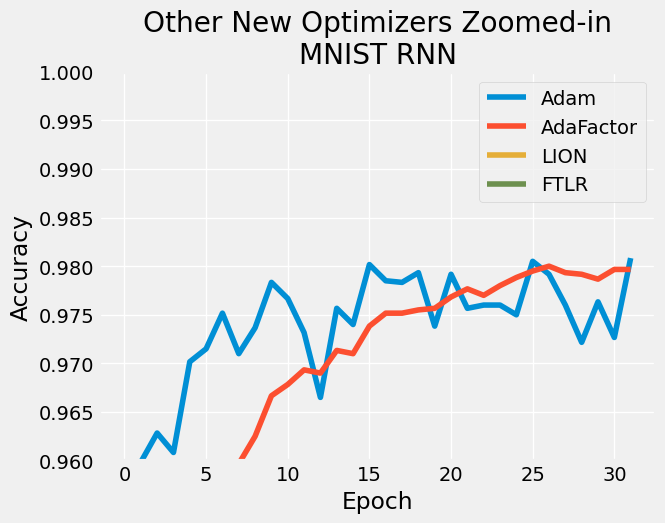

In [21]:
plt.plot(h0.history['val_accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.plot(h3.history['val_accuracy'])
plt.plot(h5.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','AdaFactor','LION','FTLR'])
plt.title('Other New Optimizers Zoomed-in\nMNIST RNN')
plt.ylim([0.96,1.00])
plt.grid(color='white')
plt.show()

In [20]:
m=model_core(input_shape,num_classes)
m.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)             │ (None, 128)                 │          20,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,898 (148.04 KB)

 Trainable params: 37,898 (148.04 KB)

 Non-trainable params: 0 (0.00 B)